Generated Array: [-20  22  14 -50 -28 -52  10  32  -6 -18  24 -38  49 -57 -26  38   4 -57
 -32  27  16 -48 -51  44 -58 -62  47  38  30  52 -31  28 -60 -63 -22  41
  57  37  52  18  58 -54   8  14]
Array from File: [-20  22  14 -50 -28 -52  10  32  -6 -18  24 -38  49 -57 -26  38   4 -57
 -32  27  16 -48 -51  44 -58 -62  47  38  30  52 -31  28 -60 -63 -22  41
  57  37  52  18  58 -54   8  14]


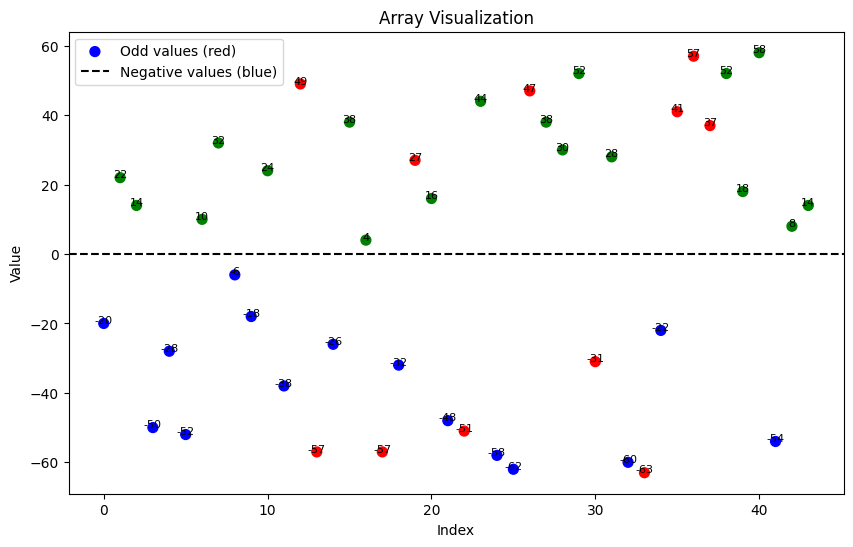

Odd count: 11, Odd mean: -0.09090909090909091
Sum between negatives: -21, Count: 40


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерація масиву
def generate_array():
    while True:
        array = np.random.randint(-64, 65, size=44)
        neg_count = np.sum(array < 0)
        odd_count = np.sum(array % 2 != 0)
        if 40 <= (neg_count / 44) * 100 <= 60 and odd_count <= 0.25 * 44:
            return array

# 2. Збереження масиву в файл
def save_array_to_file(array, filename="array.txt"):
    np.savetxt(filename, array, fmt='%d')

# 3. Зчитування масиву з файлу
def read_array_from_file(filename="array.txt"):
    return np.loadtxt(filename, dtype=int)

# 4. Візуалізація масиву
def visualize_array(array):
    x = np.arange(len(array))
    colors = ['red' if val % 2 != 0 else 'blue' if val < 0 else 'green' for val in array]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, array, c=colors, s=50, label='Array values')
    for i, val in enumerate(array):
        plt.text(i, array[i], str(val), fontsize=8, ha='center')
    
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Array Visualization")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend(["Odd values (red)", "Negative values (blue)"])
    plt.show()

# 5. Розрахунок характеристик масиву
def calculate_odd_statistics(array):
    odd_elements = array[array % 2 != 0]
    count = len(odd_elements)
    mean_value = np.mean(odd_elements) if count > 0 else 0
    return count, mean_value

def calculate_between_negatives(array):
    neg_indices = np.where(array < 0)[0]
    if len(neg_indices) < 2:
        return 0, 0
    subarray = array[neg_indices[0] + 1:neg_indices[-1]]
    return np.sum(subarray), len(subarray)

# 6. Стиснення масиву
def compress_array(array, threshold):
    compressed = [val for val in array if val >= threshold]
    compressed.extend([0] * (len(array) - len(compressed)))
    return np.array(compressed)

def visualize_compressed_array(array, threshold):
    x = np.arange(len(array))
    plt.figure(figsize=(10, 6))
    plt.scatter(x, array, c='purple', s=50, label='Compressed values')
    plt.axhline(threshold, color='orange', linestyle='--', label=f'Threshold: {threshold}')
    plt.title("Compressed Array Visualization")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Виконання програми
if __name__ == "__main__":
    # Генерація масиву
    array = generate_array()
    print("Generated Array:", array)
    
    # Збереження в файл
    save_array_to_file(array)
    
    # Зчитування з файлу
    array_from_file = read_array_from_file()
    print("Array from File:", array_from_file)
    
    # Візуалізація
    visualize_array(array_from_file)
    
    # Розрахунок характеристик
    odd_count, odd_mean = calculate_odd_statistics(array_from_file)
    print(f"Odd count: {odd_count}, Odd mean: {odd_mean}")
    
    neg_sum, neg_count = calculate_between_negatives(array_from_file)
    print(f"Sum between negatives: {neg_sum}, Count: {neg_count}")
    
    # Стиснення масиву
    threshold = int(input("Enter threshold value: "))
    compressed_array = compress_array(array_from_file, threshold)
    print("Compressed Array:", compressed_array)
    
    # Візуалізація стиснутого масиву
    visualize_compressed_array(compressed_array, threshold)
